In [14]:
# READ ME:
# also sometimes the notebook doesn't keep up with updates made to the class file so you have to restart the kernel
# lastly, the TreeDisplay has a method to render a pdf and it can do that from a normal python file if you don't want to use a notebook

In [15]:
from collections import deque
from graphviz import Digraph
from LL1parser import CFG, Lexer

In [16]:
class TreeDisplay():
    def __init__(self, rootNode):
        self.rootNode = rootNode
    
    def graph_to_dot(self, rootNode):
        dot = Digraph(format='svg')
        dot.attr('node', shape='oval')

        worklist = deque()
        worklist.append(rootNode)
        processed = set()
        while worklist:
            node = worklist.popleft()
            nodeLabel = node.value if node.kind == 'char' else node.kind
            dot.node(str(id(node)), nodeLabel)

            for child in node.children:
                if child not in processed:
                    childLabel = child.value if child.kind == 'char' else child.kind
                    dot.node(str(id(child)), childLabel)
                    dot.edge(str(id(node)), str(id(child)))
                    worklist.append(child)
                    processed.add(child)
        return dot
    
    def render_pdf(self, filename=None):
        d = self.graph_to_dot(self.rootNode)
        if filename is None:
            d.render(cleanup=True, format='pdf', directory='tree-images')
        else:
            d.render(filename=filename, cleanup=True, format='pdf', directory='tree-images')

    def _repr_svg_(self):
        d = self.graph_to_dot(self.rootNode)
        result = d.pipe()
        return result.decode('utf-8')

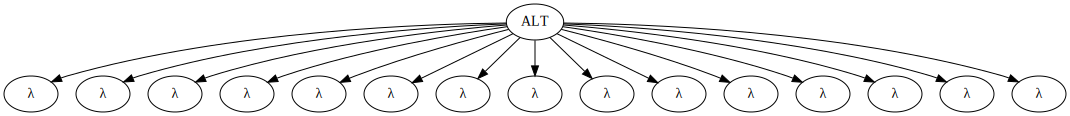

In [18]:
cfg = CFG()
filename = 'llre.cfg'
try:
    with open(filename) as file:
        for line in file:
            cfg.add_production_rule(line.strip())
except FileNotFoundError:
    print(f"File '{filename}' not found, check your input")


cfg.generate_llt()

l = Lexer()
ts = l.lex('||||||||||||||')

tree = cfg.parse(ts)

td = TreeDisplay(tree)
td
# td.render_pdf('rawparsetree.pdf')